<a href="https://colab.research.google.com/github/vpagonis/Classical_Mechanics_2nd_Edition/blob/main/Python_Codes_Chapter_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 11.1

In [1]:
%reset -f

from numpy import    cross
from sympy import   sin, cos, symbols, simplify
print('-'*28,'CODE OUTPUT','-'*29,'\n')

R, omega, t, m , theta = symbols('R, omega, t, m, theta',real=True)

r_vector =  [R*cos(omega*t),R*sin(omega*t),0]

omega_vector =  [0,0,omega]

v_vector = simplify(cross(omega_vector, r_vector) )
print('\nv_vector = ',v_vector)

L_vector = m* cross(r_vector,v_vector )

print('\nL = ',simplify(L_vector))



---------------------------- CODE OUTPUT ----------------------------- 


v_vector =  [-R*omega*sin(omega*t), R*omega*cos(omega*t), 0]

L =  [0, 0, R**2*m*omega]


# Example 11.2

In [2]:
%reset -f

from numpy import    cross
from sympy import   sin, cos, symbols, simplify
print('-'*28,'CODE OUTPUT','-'*29,'\n')

R, omega, t, m , theta = symbols('R, omega, t, m, theta',real=True)

r_vector =  [R*sin(theta)*cos(omega*t),R*sin(theta)*sin(omega*t),\
                       R*cos(theta)]

omega_vector =  [0,0,omega]
v_vector = simplify(cross(omega_vector, r_vector) )
L_vector = m* cross(r_vector,v_vector )

print('Lx_component = ',L_vector[0])
print('Ly_component = ',L_vector[1])
print('Lz_component = ',simplify(L_vector[2]))


---------------------------- CODE OUTPUT ----------------------------- 

Lx_component =  -R**2*m*omega*sin(theta)*cos(theta)*cos(omega*t)
Ly_component =  -R**2*m*omega*sin(theta)*sin(omega*t)*cos(theta)
Lz_component =  R**2*m*omega*sin(theta)**2


# Example 11.3

In [3]:
%reset -f

from numpy import dot
from sympy import  Matrix,sin, cos, symbols, simplify
print('-'*28,'CODE OUTPUT','-'*29,'\n')

R, omega, t, m , theta, phi = symbols('R,omega,t,m,theta, phi',real=True)

x = R*sin(phi)*cos(theta)
y = R*sin(phi)*sin(theta)
z = R*cos(phi)

rsq = x**2+y**2+z**2

Ixx, Iyy, Izz = m*(rsq-x**2), m*(rsq-y**2), m*(rsq-z**2)
Ixy, Ixz, Iyz = -m*x*y, -m*x*z, -m*y*z

I = Matrix([[Ixx,Ixy,Ixz],[Ixy,Iyy,Iyz],[Ixz,Iyz,Izz]])

omega_matrix=Matrix([0,0,omega])

print('Lx-component = ', dot(I,omega_matrix)[0][0])

print('\nLy-component = ', dot(I,omega_matrix)[1][0])

print('\nLz-component = ', simplify(dot(I,omega_matrix)[2][0]))



---------------------------- CODE OUTPUT ----------------------------- 

Lx-component =  -R**2*m*omega*sin(phi)*cos(phi)*cos(theta)

Ly-component =  -R**2*m*omega*sin(phi)*sin(theta)*cos(phi)

Lz-component =  R**2*m*omega*sin(phi)**2


# Example 11.4

In [4]:
%reset -f

from sympy import symbols, integrate, Matrix
print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, y, z, a, m = symbols('x, y, z, a, m',real=True)  #  symbols

# evaluate the integrals using triple itegration in SymPy
Ixx = Iyy =Izz = integrate(y**2+x**2, (x,-a/2,a/2),\
   (y,-a/2,a/2),( z,-a/2,a/2))*m/a**3

Ixy = Ixz = Iyz= -integrate(x*y,(x,-a/2,a/2),\
   (y,-a/2,a/2), (z,-a/2,a/2))*m/a**3

I = Matrix([[Ixx,Ixy,Ixz], [Ixy,Iyy,Iyz], [Ixz,Iyz,Izz]])
print('The inertia tensor I is:\n')
I


---------------------------- CODE OUTPUT ----------------------------- 

The inertia tensor I is:



Matrix([
[a**2*m/6,        0,        0],
[       0, a**2*m/6,        0],
[       0,        0, a**2*m/6]])

# Example 11.5

In [5]:
%reset -f

from scipy.integrate import tplquad
import numpy as np
from sympy import symbols
print('-'*28,'CODE OUTPUT','-'*29,'\n')

z2 = lambda y, z: 1-y-z #upper limit for z integration
x2 = lambda z: 1-z      #upper limit for x integration

def f(i):
    return tplquad(i, 0, 1,   0, x2,   0, z2)[0]

Ixx = lambda z, y, x: (y**2+z**2)
Iyy = lambda z, y, x: (x**2+z**2)
Izz = lambda z, y, x: (y**2+x**2)

Ixy = lambda z, y, x: -x*y
Ixz = lambda z, y, x: -x*z
Iyz = lambda z, y, x: -y*z

I = np.array([[f(Ixx),f(Ixy),f(Ixz)],[f(Ixy),f(Iyy),f(Iyz)],\
[f(Ixz),f(Iyz),f(Izz)]])
print('Moment of inertia tensor I=')
I


---------------------------- CODE OUTPUT ----------------------------- 

Moment of inertia tensor I=


array([[ 0.03333333, -0.00833333, -0.00833333],
       [-0.00833333,  0.03333333, -0.00833333],
       [-0.00833333, -0.00833333,  0.03333333]])

# Example 11.6

In [6]:
%reset -f

from sympy import symbols, integrate, Matrix, sqrt
import numpy as np
print('-'*28,'CODE OUTPUT','-'*29,'\n')

x, y, z, a, m = symbols('x, y, z, a, m',real=True)  #  symbols

# evaluate the integrals using triple itegration in SymPy
Ixx = integrate(y**2+x**2, (x,0,a), (y,0,a),(z,0,a))
Iyy = integrate(y**2+x**2, (x,0,a), (y,0,a),(z,0,a))
Izz = integrate(y**2+x**2, (x,0,a), (y,0,a),(z,0,a))

Ixy = -integrate(x*y,(x,0,a), (y,0,a), (z,0,a))
Ixz = -integrate(x*y,(x,0,a), (y,0,a), (z,0,a))
Iyz= -integrate(x*y,(x,0,a), (y,0,a), (z,0,a))

I = np.array([[Ixx,Ixy,Ixz],[Ixy,Iyy,Iyz],[Ixz,Iyz,Izz]])*m/a**3

omega = np.array([1/sqrt(3),1/sqrt(3),1/sqrt(3)])
omega_trnsp = np.transpose(omega)

print('(a) When rotational axis is along diagonal,\
I = ',omega_trnsp @ (I @ omega))

omega = np.array([1/sqrt(2),1/sqrt(2),0])
omega_trnsp = np.transpose(omega)

print('\n(b) When rotational axis is along face diagonal,\
I = ',omega_trnsp @ (I @ omega))

omega = np.array([1,0,0])
omega_trnsp = np.transpose(omega)

print('\n(c) When rotational axis is along edge of cube,\
I = ',omega_trnsp @ (I @ omega))


---------------------------- CODE OUTPUT ----------------------------- 

(a) When rotational axis is along diagonal,I =  a**2*m/6

(b) When rotational axis is along face diagonal,I =  5*a**2*m/12

(c) When rotational axis is along edge of cube,I =  2*a**2*m/3


# Example 11.7

---------------------------- CODE OUTPUT ----------------------------- 

The eigenvalues are: 
{a**2*m/6: 1, 11*a**2*m/12: 2}

 The eigenvectors are:
Matrix([[1], [1], [1]])
Matrix([[-1], [1], [0]])
Matrix([[-1], [0], [1]])


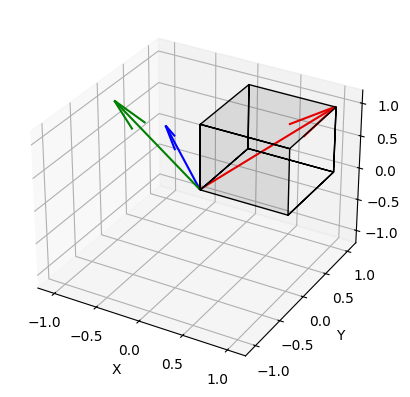

In [8]:
%reset -f

from sympy import Matrix, symbols, integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

x, y, z, a, m = symbols('x, y, z, a, m',real=True)  #  symbols

# evaluate the integrals using triple integration in SymPy
Ixx = integrate(y**2+x**2, (x,0,a), (y,0,a),\
                ( z,0,a))*m/a**3
Iyy = integrate(y**2+x**2, (x,0,a), (y,0,a),\
                ( z,0,a))*m/a**3
Izz = integrate(y**2+x**2, (x,0,a), (y,0,a),\
                ( z,0,a))*m/a**3

Ixy = -integrate(x*y,(x,0,a), (y,0,a), (z,0,a))*m/a**3
Ixz = -integrate(x*y,(x,0,a), (y,0,a), (z,0,a))*m/a**3
Iyz= -integrate(x*y,(x,0,a), (y,0,a), (z,0,a))*m/a**3

I = Matrix([[Ixx,Ixy,Ixz], [Ixy,Iyy,Iyz], [Ixz,Iyz,Izz]])
print('-'*28,'CODE OUTPUT','-'*29,'\n')

print('The eigenvalues are: ')
print(I.eigenvals())

print('\n The eigenvectors are:')
vec1 = I.eigenvects()[0][2][0]
vec2 = I.eigenvects()[1][2][0]
vec3 = I.eigenvects()[1][2][1]
print(vec1)
print(vec2)
print(vec3)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')   # set up 3D plot
ax.quiver(0,0,0,vec1[0],vec1[1],vec1[2],color='r',\
length=1,arrow_length_ratio=.3)
ax.quiver(0,0,0,vec2[0],vec2[1],vec2[2],color='b',\
length=1,arrow_length_ratio=.3)
ax.quiver(0,0,0,vec3[0],vec3[1],vec3[2],color='g',\
length=1,arrow_length_ratio=.3)

ax.set_xlabel('X')     # label,set limits on x,y,z axes
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-1.2,1.2);
ax.set_ylim(-1.2,1.2);
ax.set_zlim(-1.2,1.2);

shape=[((0,0,0),(1,0,0),(1,1,0),(0,1,0),\
       (0,0,0),(0,0,1),(0,1,1),(0,1,0),\
       (0,0,0),(0,0,1),(1,0,1),(1,1,1),(0,1,1),\
    (0,1,0),(1,1,0),(1,1,1),(1,1,0),(1,0,0),(1,0,1),(0,0,1) )]
cube =Poly3DCollection(shape,color='k',alpha=0.1)  # draw the cube
ax.add_collection3d(cube)
plt.show()

# Example 11.8

---------------------------- CODE OUTPUT ----------------------------- 

The eigenvalues are: 
{a**2*m/6: 3}

 The eigenvectors are:
Matrix([[1], [0], [0]])
Matrix([[0], [1], [0]])
Matrix([[0], [0], [1]])


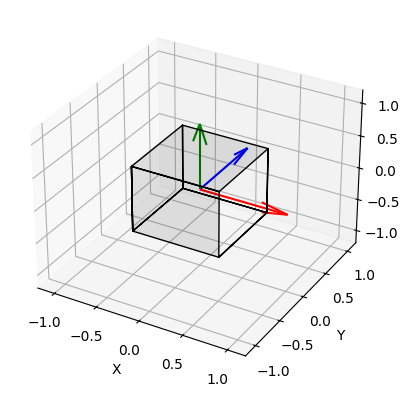

In [9]:
%reset -f

from sympy import Matrix, symbols, integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

x, y, z, a, m = symbols('x, y, z, a, m',real=True)  #  symbols

# evaluate the integrals using triple integration in SymPy
Ixx = integrate(y**2+x**2, (x,-a/2,a/2), (y,-a/2,a/2),\
                ( z,-a/2,a/2))

Iyy = integrate(y**2+x**2, (x,-a/2,a/2), (y,-a/2,a/2),\
                ( z,-a/2,a/2))

Izz = integrate(y**2+x**2, (x,-a/2,a/2), (y,-a/2,a/2),\
                ( z,-a/2,a/2))

Ixy = -integrate(x*y,(x,-a/2,a/2), (y,-a/2,a/2), (z,-a/2,a/2))

Ixz = -integrate(x*y,(x,-a/2,a/2), (y,-a/2,a/2), (z,-a/2,a/2))

Iyz= -integrate(x*y,(x,-a/2,a/2), (y,-a/2,a/2), (z,-a/2,a/2))

I = m/a**3*Matrix([[Ixx,Ixy,Ixz], [Ixy,Iyy,Iyz], [Ixz,Iyz,Izz]])

print('-'*28,'CODE OUTPUT','-'*29,'\n')

print('The eigenvalues are: ')
print(I.eigenvals())

print('\n The eigenvectors are:')
vec1 = I.eigenvects()[0][2][0]
vec2 = I.eigenvects()[0][2][1]
vec3 = I.eigenvects()[0][2][2]
print(vec1)
print(vec2)
print(vec3)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')   # set up 3D plot
ax.quiver(0,0,0,vec1[0],vec1[1],vec1[2],color='r',\
length=1,arrow_length_ratio=.3)
ax.quiver(0,0,0,vec2[0],vec2[1],vec2[2],color='b',\
length=1,arrow_length_ratio=.3)
ax.quiver(0,0,0,vec3[0],vec3[1],vec3[2],color='g',\
length=1,arrow_length_ratio=.3)

ax.set_xlabel('X')     # label,set limits on x,y,z axes
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-1.2,1.2);
ax.set_ylim(-1.2,1.2);
ax.set_zlim(-1.2,1.2);

shape=[((-0.5,-0.5,-0.5),(0.5,-.5,-.5),(.5,.5,-.5),(-.5,0.5,-.5),\
(-0.5,-0.5,-0.5),(-.5,-.5,.5),(-.5,.5,.5),(-.5,.5,-.5),\
(-0.5,-0.5,-0.5),(-.5,-.5,.5),(.5,-.5,.5),(.5,.5,.5),(-.5,.5,.5),\
(-.5,.5,-.5),(.5,.5,-.5),(.5,.5,.5),(.5,.5,-.5),(.5,-.5,-.5),\
(.5,-.5,.5),(-.5,-.5,.5) )]

cube =Poly3DCollection(shape,color='k',alpha=0.1)  # draw the cube
ax.add_collection3d(cube)
plt.show()